In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.count()

price               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [4]:
y = df['price']

<Axes: xlabel='area', ylabel='price'>

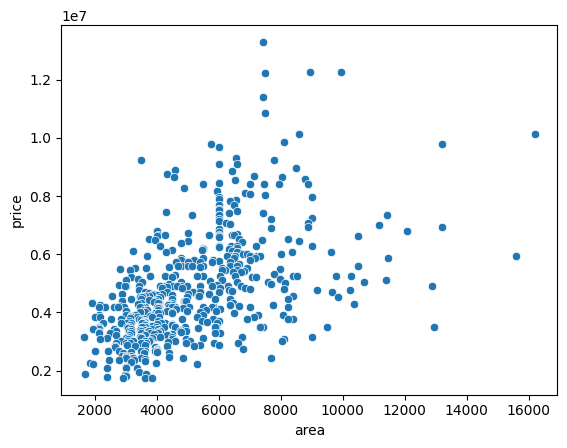

In [5]:
sns.scatterplot(data=df, x='area', y='price')

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [8]:
ln = LinearRegression()

In [11]:
ref = RFE(ln, n_features_to_select=5)

In [13]:
ref.fit(df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']],y)

ValueError: could not convert string to float: 'yes'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
df_road_encoded = pd.get_dummies(df['mainroad'],prefix='mainroad',columns=['mainroad'])

In [27]:
df = pd.concat([df,df_road_encoded], axis=1)

In [29]:
df_guest_room = pd.get_dummies(df['guestroom'],prefix='guestroom',columns=['guestroom'])

In [30]:
df = pd.concat([df,df_guest_room], axis=1)

In [32]:
df_basement_encoded = pd.get_dummies(df['basement'],prefix='basement',columns=['basement']) 
df = pd.concat([df,df_basement_encoded], axis=1)

In [34]:
df_hotwater_encoded = pd.get_dummies(df['hotwaterheating'],prefix='hotwaterheating',columns=['hotwaterheating'])
df = pd.concat([df,df_hotwater_encoded], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   mainroad             545 non-null    object
 6   guestroom            545 non-null    object
 7   basement             545 non-null    object
 8   hotwaterheating      545 non-null    object
 9   airconditioning      545 non-null    object
 10  parking              545 non-null    int64 
 11  prefarea             545 non-null    object
 12  furnishingstatus     545 non-null    object
 13  mainroad_no          545 non-null    bool  
 14  mainroad_yes         545 non-null    bool  
 15  guestroom_no         545 non-null    bool  
 16  guestroo

In [37]:
df_aircondition_encoded = pd.get_dummies(df['airconditioning'],prefix='airconditioning',columns=['airconditioning'])
df = pd.concat([df,df_aircondition_encoded], axis=1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   mainroad             545 non-null    object
 6   guestroom            545 non-null    object
 7   basement             545 non-null    object
 8   hotwaterheating      545 non-null    object
 9   airconditioning      545 non-null    object
 10  parking              545 non-null    int64 
 11  prefarea             545 non-null    object
 12  furnishingstatus     545 non-null    object
 13  mainroad_no          545 non-null    bool  
 14  mainroad_yes         545 non-null    bool  
 15  guestroom_no         545 non-null    bool  
 16  guestroo

In [39]:
df["prefarea"].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [40]:
df_prefarea_encoded = pd.get_dummies(df['prefarea'],prefix='prefarea',columns=['prefarea'])
df = pd.concat([df,df_prefarea_encoded], axis=1)

In [41]:
df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [42]:
df_furnishingstatus_encoded = pd.get_dummies(df['furnishingstatus'],prefix='furnishingstatus',columns=['furnishingstatus'])
df = pd.concat([df,df_furnishingstatus_encoded], axis=1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   price                            545 non-null    int64 
 1   area                             545 non-null    int64 
 2   bedrooms                         545 non-null    int64 
 3   bathrooms                        545 non-null    int64 
 4   stories                          545 non-null    int64 
 5   mainroad                         545 non-null    object
 6   guestroom                        545 non-null    object
 7   basement                         545 non-null    object
 8   hotwaterheating                  545 non-null    object
 9   airconditioning                  545 non-null    object
 10  parking                          545 non-null    int64 
 11  prefarea                         545 non-null    object
 12  furnishingstatus                 545

In [44]:
df = df.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    bool 
 7   mainroad_yes                     545 non-null    bool 
 8   guestroom_no                     545 non-null    bool 
 9   guestroom_yes                    545 non-null    bool 
 10  basement_no                      545 non-null    bool 
 11  basement_yes                     545 non-null    bool 
 12  hotwaterheating_no               545 non-null    b

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

In [60]:
rf = RFE(ln, n_features_to_select=15)
X = df.drop(columns=['price'],axis=1)
y = df['price']
rf.fit(X,y)



,estimator,LinearRegression()
,n_features_to_select,15
,step,1
,verbose,0
,importance_getter,'auto'
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
print("Selected features:", list(X.columns[rf.support_]))
print("Ranking of all features:\n", pd.DataFrame({'Feature': X.columns, 'Rank': rf.ranking_}))

Selected features: ['bathrooms', 'stories', 'parking', 'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes', 'prefarea_no', 'prefarea_yes', 'furnishingstatus_unfurnished']
Ranking of all features:
                             Feature  Rank
0                              area     6
1                          bedrooms     2
2                         bathrooms     1
3                           stories     1
4                           parking     1
5                       mainroad_no     1
6                      mainroad_yes     1
7                      guestroom_no     1
8                     guestroom_yes     1
9                       basement_no     3
10                     basement_yes     1
11               hotwaterheating_no     1
12              hotwaterheating_yes     1
13               airconditioning_no     1
14              airconditioning_yes     1
15            

In [62]:
model1 = LinearRegression()
x = df.drop(columns=['price'],axis=1)
y = df['price']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
model1.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


<Axes: >

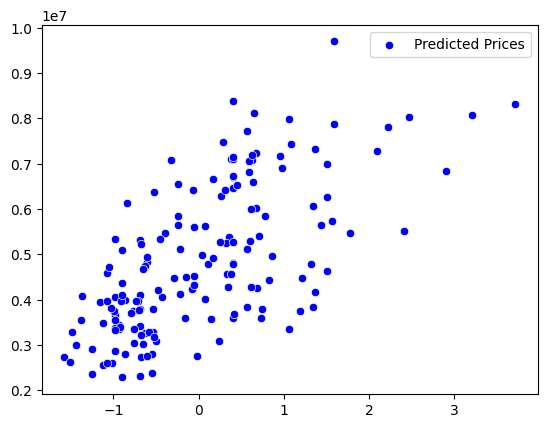

In [ ]:
sns.scatterplot(x=X_test_scaled[:,0], y=model1.predict(X_test_scaled), color='blue', label='Predicted Prices')
sns.plot()

<Axes: >

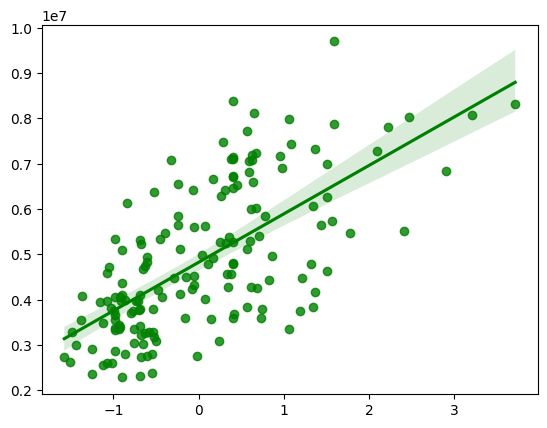

In [68]:
sns.regplot(x=X_test_scaled[:,0], y=model1.predict(X_test_scaled), color='green', label='Predicted Prices')

<Axes: ylabel='price'>

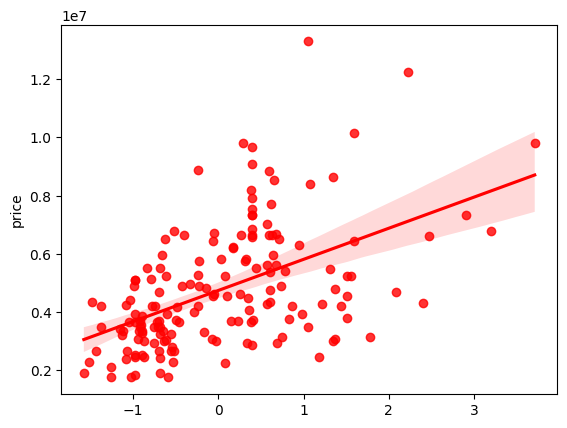

In [69]:
sns.regplot(x=X_test_scaled[:,0], y=y_test, color='red', label='Actual Prices')

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model1.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')        

Mean Squared Error: 1523019469501.29
Root Mean Squared Error: 1523019469501.29
Mean Absolute Error: 920392.9397607954


In [73]:
print(f"r2 Score: {r2}")

r2 Score: 0.6463350878895879
